<font size = 8 color='#23282b'>ANALISIS DESEMPEÑO DE PELICULAS</font></b><a name="ANALISIS DESEMPAÑO DE PELICULAS"></a>






In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib as mpl

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
plt.style.use('seaborn-v0_8-dark-palette')

In [5]:
ruta_csv='/content/drive/MyDrive/AuJ/moviesdataset.csv'
df=pd.read_csv(ruta_csv, sep=',')
df

,Title,Genre,Year,Budget,Revenue,IMDB_Rating
0,The Last Journey,Drama,2020,11000000,3.404969e+07,4.9
1,Infinite Dreams,Drama,2004,178000000,5.504360e+08,6.6
2,Code of Shadows,Romance,2018,13000000,7.855773e+06,4.7
3,Ocean Whisper,Action,2016,148000000,1.769979e+08,7.2
4,Forgotten Realm,Romance,2017,61000000,1.264061e+08,NaN
5,Neon City,Comedy,2000,80M,3.621845e+08,5.1
6,Silent Horizon,Fantasy,2006,31000000,2.556292e+07,4.1
7,Echoes of Tomorrow,Sci-Fi,2011,211000000,1.375882e+08,NaN
8,Digital Frontier,NaN,2003,25000000,6.080356e+07,8.2
9,Whispers in the Dark,Fantasy,2019,152000000,1.782975e+08,3.9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        22 non-null     object 
 1   Genre        18 non-null     object 
 2   Year         22 non-null     object 
 3   Budget       22 non-null     object 
 4   Revenue      19 non-null     float64
 5   IMDB_Rating  18 non-null     float64
dtypes: float64(2), object(4)
memory usage: 1.2+ KB


In [7]:
df.head()

,Title,Genre,Year,Budget,Revenue,IMDB_Rating
0,The Last Journey,Drama,2020,11000000,3.404969e+07,4.9
1,Infinite Dreams,Drama,2004,178000000,5.504360e+08,6.6
2,Code of Shadows,Romance,2018,13000000,7.855773e+06,4.7
3,Ocean Whisper,Action,2016,148000000,1.769979e+08,7.2
4,Forgotten Realm,Romance,2017,61000000,1.264061e+08,NaN


In [8]:
df.isnull().sum()

,0
Title,0
Genre,4
Year,0
Budget,0
Revenue,3
IMDB_Rating,4


In [9]:
def convertir_millones(x):
    if isinstance(x, str) and x.endswith('M'):
        return float(x[:-1]) * 1000000
    else:
        return float(x)

df['Budget'] = df['Budget'].apply(convertir_millones)

df

,Title,Genre,Year,Budget,Revenue,IMDB_Rating
0,The Last Journey,Drama,2020,11000000.0,3.404969e+07,4.9
1,Infinite Dreams,Drama,2004,178000000.0,5.504360e+08,6.6
2,Code of Shadows,Romance,2018,13000000.0,7.855773e+06,4.7
3,Ocean Whisper,Action,2016,148000000.0,1.769979e+08,7.2
4,Forgotten Realm,Romance,2017,61000000.0,1.264061e+08,NaN
5,Neon City,Comedy,2000,80000000.0,3.621845e+08,5.1
6,Silent Horizon,Fantasy,2006,31000000.0,2.556292e+07,4.1
7,Echoes of Tomorrow,Sci-Fi,2011,211000000.0,1.375882e+08,NaN
8,Digital Frontier,NaN,2003,25000000.0,6.080356e+07,8.2
9,Whispers in the Dark,Fantasy,2019,152000000.0,1.782975e+08,3.9


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        22 non-null     object 
 1   Genre        18 non-null     object 
 2   Year         22 non-null     object 
 3   Budget       22 non-null     float64
 4   Revenue      19 non-null     float64
 5   IMDB_Rating  18 non-null     float64
dtypes: float64(3), object(3)
memory usage: 1.2+ KB


Vemos que el tipo de dato de la columna Budget (Inversión) cambio a float64, es decir que no es mas un objeto.

In [11]:
df.describe().round(2)

,Budget,Revenue,IMDB_Rating
count,2.200000e+01,1.900000e+01,18.00
mean,1.009091e+08,1.734479e+08,5.88
std,6.962478e+07,1.366885e+08,1.49
min,1.100000e+07,7.855773e+06,3.90
25%,4.550000e+07,5.965693e+07,4.90
50%,8.950000e+07,1.502366e+08,5.55
75%,1.580000e+08,2.214591e+08,6.70
max,2.150000e+08,5.504360e+08,9.10


<Axes: >

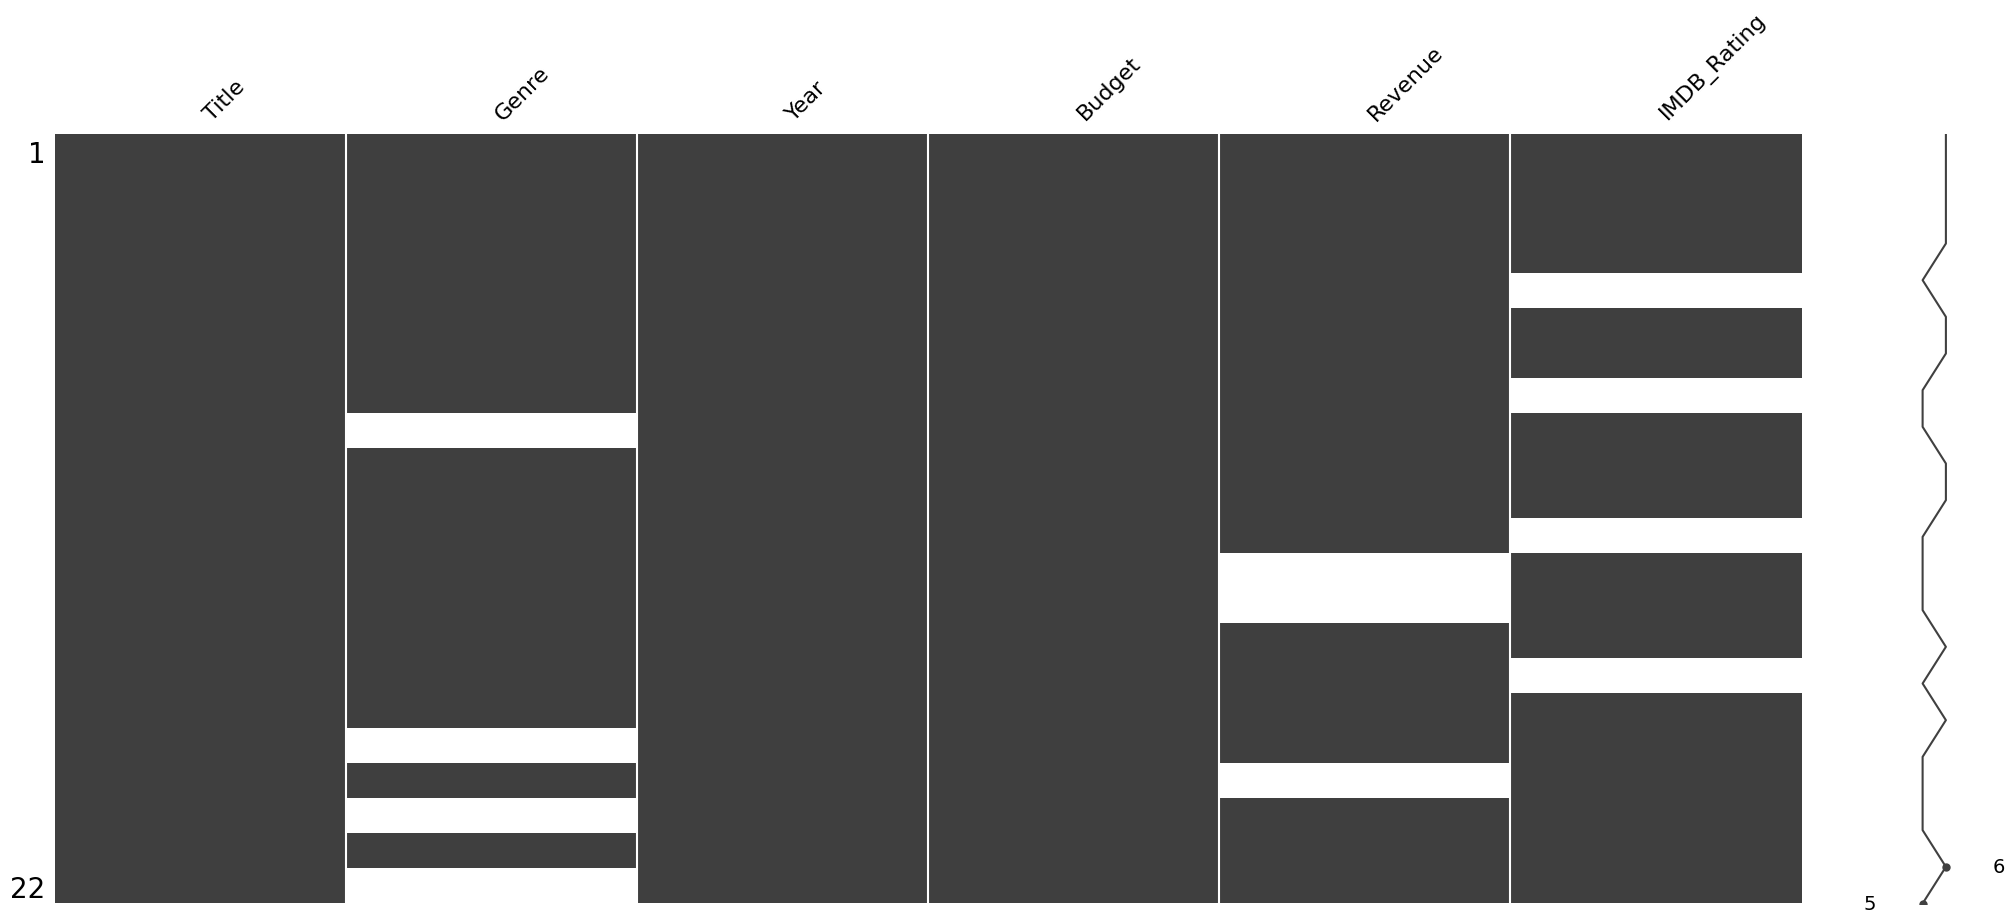

In [12]:
msno.matrix(df)

Se puede observar valores nulos en las columnas de genero, ganancias y rating.

<Axes: >

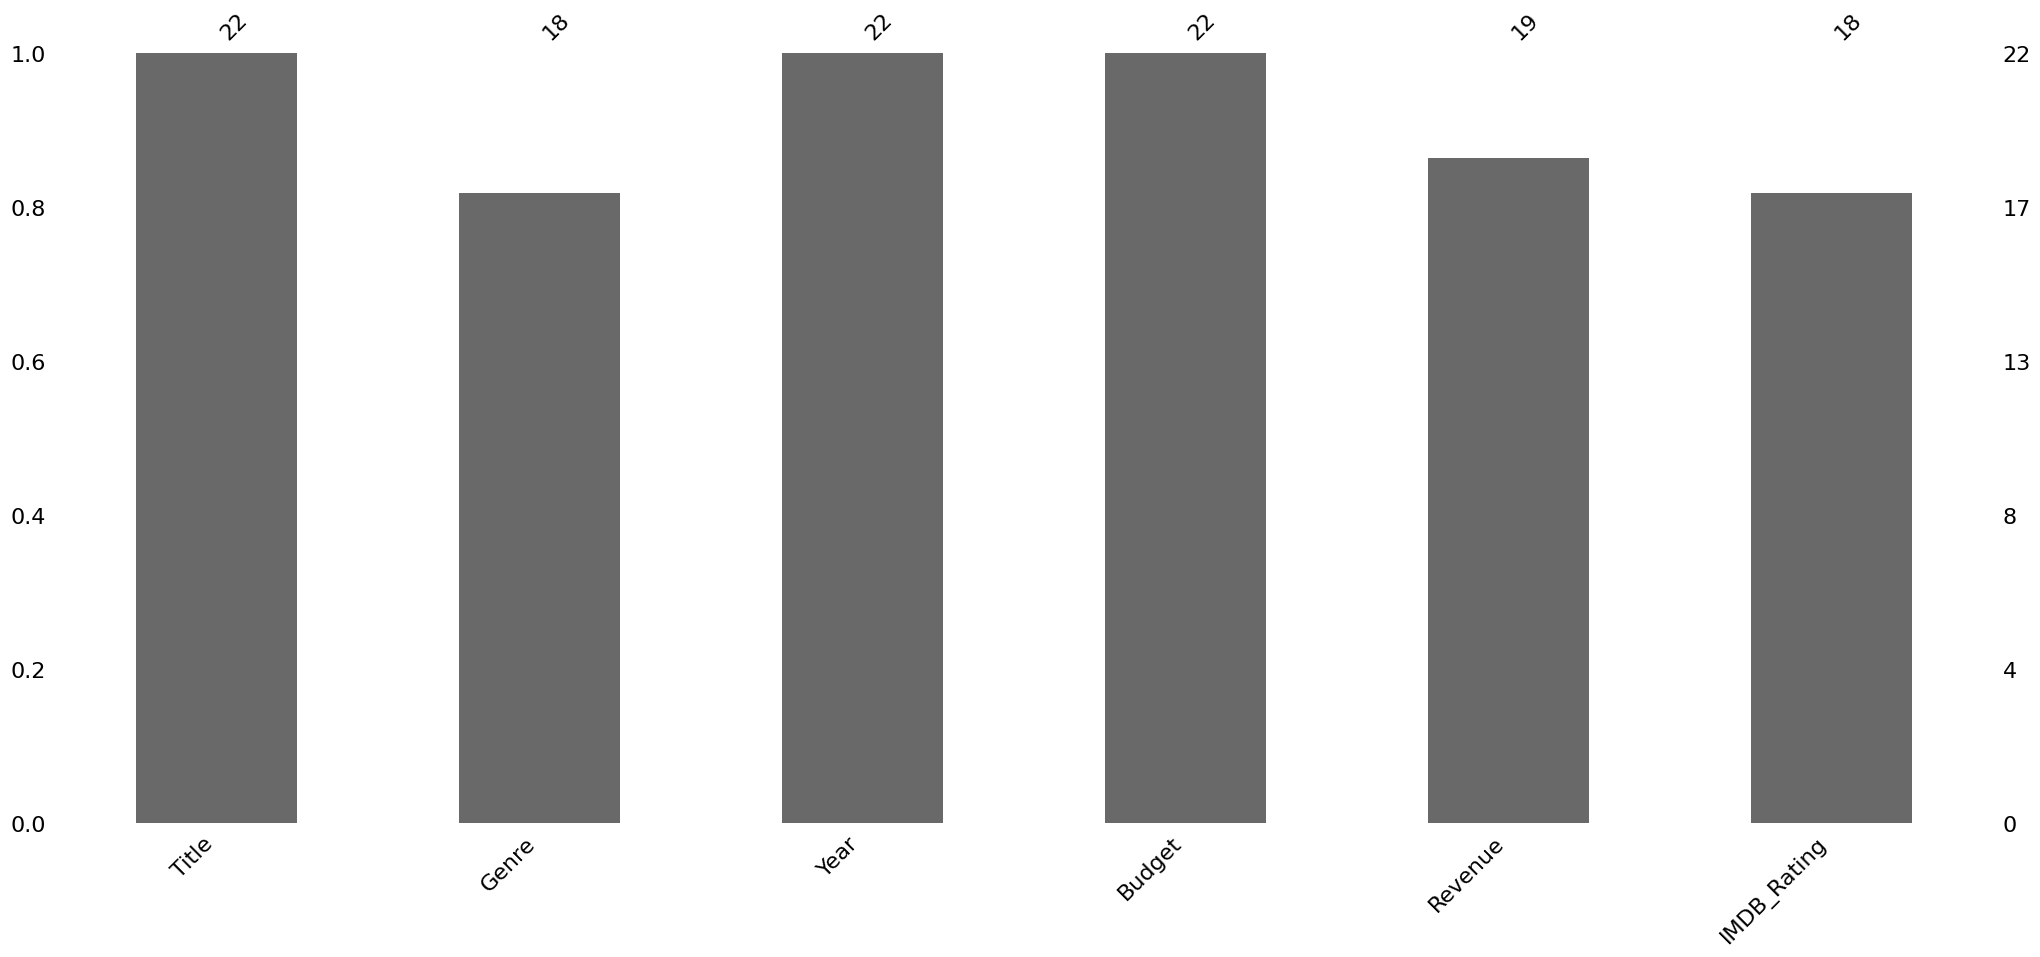

In [13]:
msno.bar(df)

<Axes: >

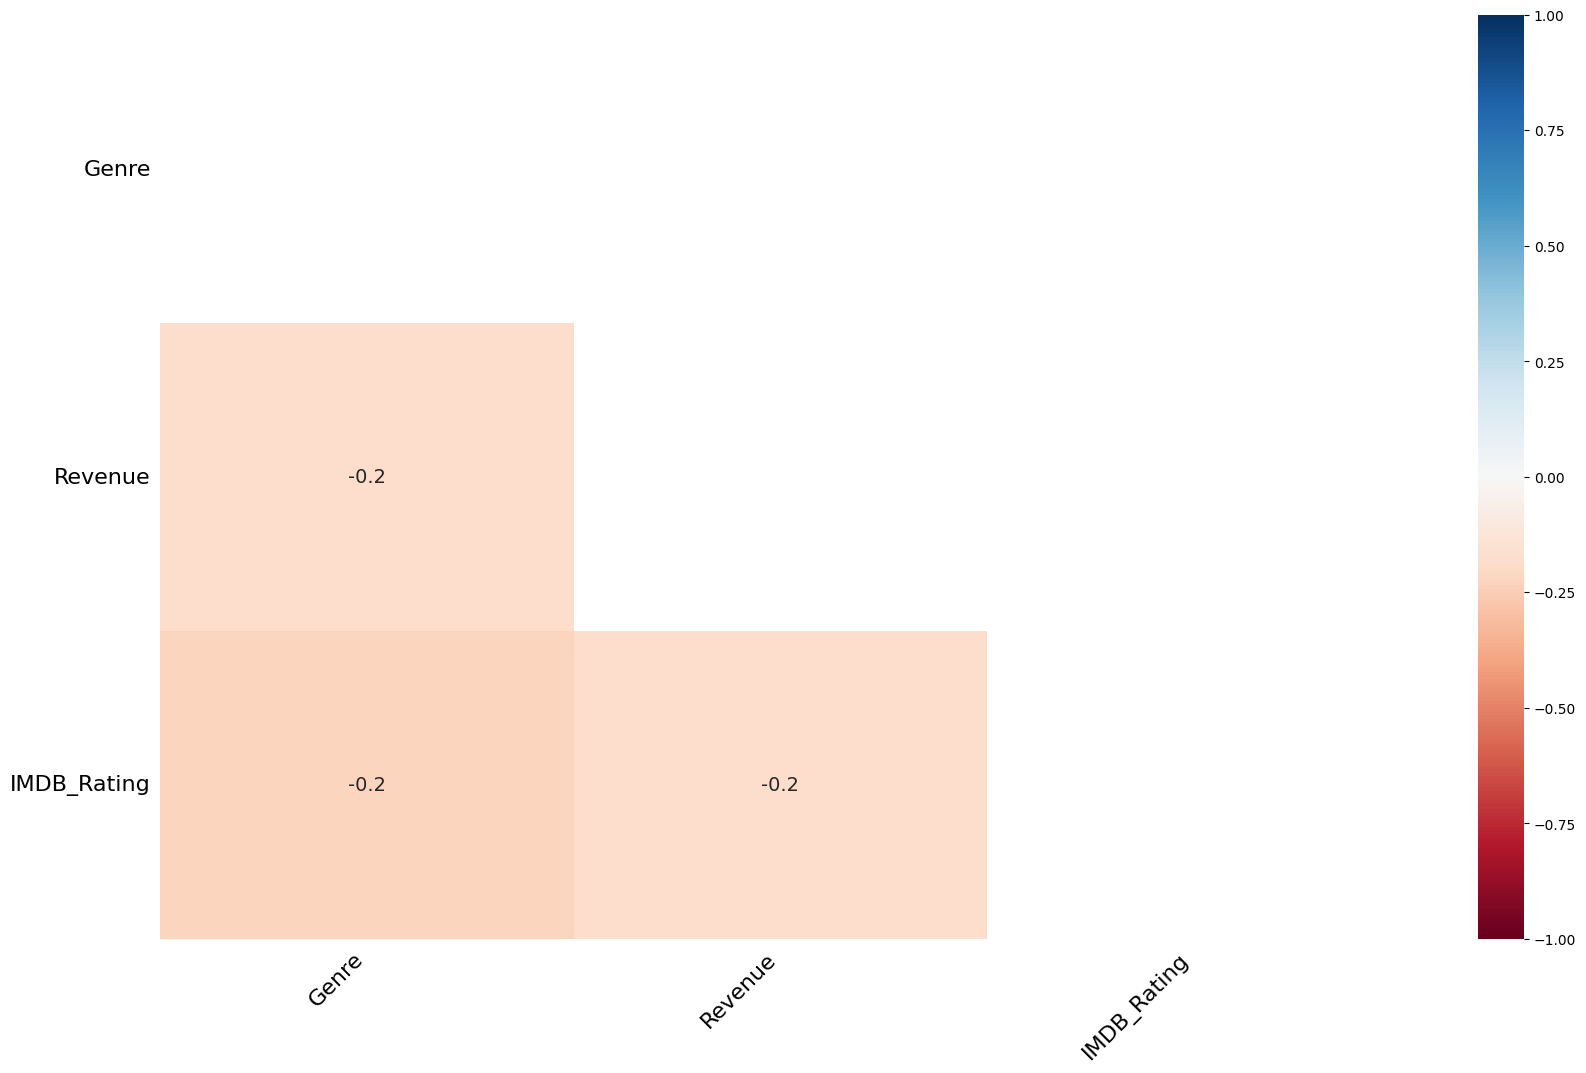

In [14]:
msno.heatmap(df)

Modifico en la columna años, aquellos que son strings y los cambio a enteros

In [15]:
year_num = pd.to_numeric(df['Year'], errors='coerce')
df = df[year_num.notna()].copy()
df['Year'] = year_num[df.index].astype(int)

df.reset_index(drop=True, inplace=True)
df


,Title,Genre,Year,Budget,Revenue,IMDB_Rating
0,The Last Journey,Drama,2020,11000000.0,3.404969e+07,4.9
1,Infinite Dreams,Drama,2004,178000000.0,5.504360e+08,6.6
2,Code of Shadows,Romance,2018,13000000.0,7.855773e+06,4.7
3,Ocean Whisper,Action,2016,148000000.0,1.769979e+08,7.2
4,Forgotten Realm,Romance,2017,61000000.0,1.264061e+08,NaN
5,Neon City,Comedy,2000,80000000.0,3.621845e+08,5.1
6,Silent Horizon,Fantasy,2006,31000000.0,2.556292e+07,4.1
7,Echoes of Tomorrow,Sci-Fi,2011,211000000.0,1.375882e+08,NaN
8,Digital Frontier,NaN,2003,25000000.0,6.080356e+07,8.2
9,Whispers in the Dark,Fantasy,2019,152000000.0,1.782975e+08,3.9


Cambio el valor de Años a formato fecha

In [16]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y').dt.year

Se crea una copia del dataset, para trabajar con esta copia en el momento de hacer los graficos e ir eliminando los valores nulos para que no me afecten los valores promedios si elimino la totalidad de valores nulos, ya que tendria casi un 3% menos de valores.

In [17]:
df = df.drop_duplicates(subset=['Title'])

In [18]:
df_copy=df.copy()

En el siguiente apartado se eliminaran los valores nulos para de esta manera mostrar un dataset limpio y con la menor cantidad de inconsistencias posibles.

In [19]:
df01 = df.dropna()

In [20]:
df01.to_csv('moviesdataset_clean.csv', index=False)

<Axes: >

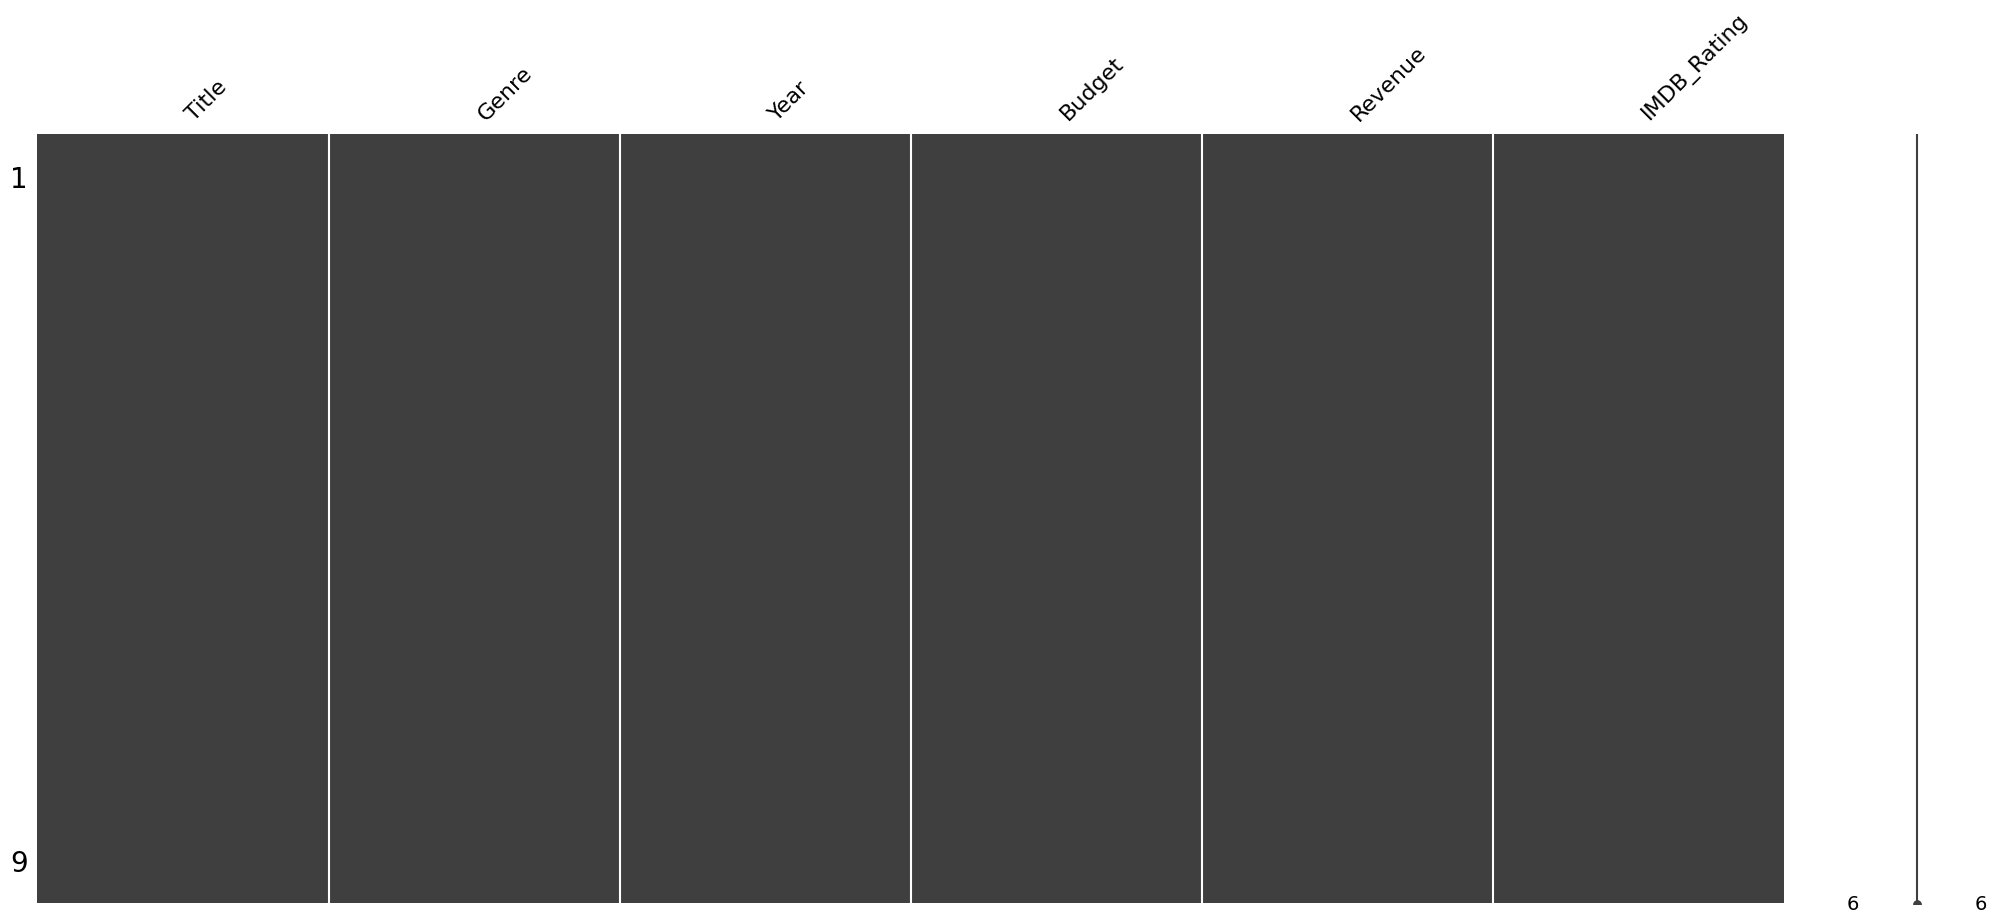

In [21]:
msno.matrix(df01)

/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<Axes: >

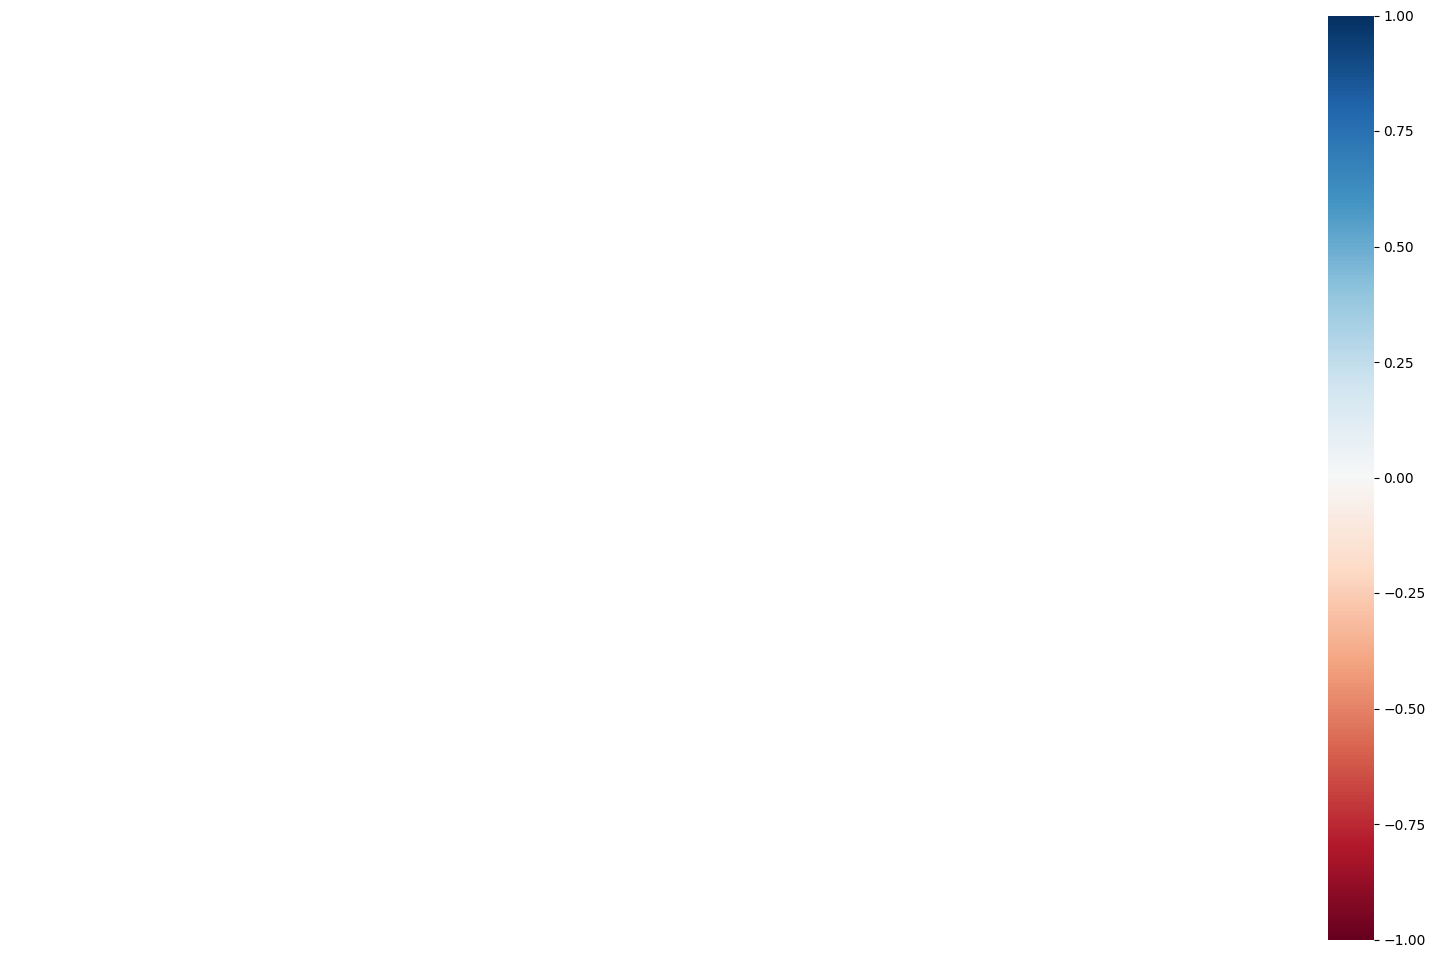

In [22]:
msno.heatmap(df01)

In [23]:
df01.isnull().sum()

,0
Title,0
Genre,0
Year,0
Budget,0
Revenue,0
IMDB_Rating,0


In [24]:
df_genre01 = df01.dropna(subset=['Genre', 'Budget', 'Revenue'])

df_promedios = df_genre01.groupby('Genre').agg({
    'Budget': 'mean',
    'Revenue': 'mean'
}).reset_index()

print(df_promedios)


      Genre       Budget       Revenue
0    Action  148000000.0  1.769979e+08
1    Comedy  101500000.0  2.935200e+08
2     Drama   94500000.0  2.922428e+08
3   Fantasy   91500000.0  1.019302e+08
4   Romance   13000000.0  7.855773e+06
5  Thriller  215000000.0  1.316554e+08


Se observa que se eliminaron los valores nulos y se agrego una columna con la diferencia entre las ganancias y la inversión.

In [25]:
df01['Profit'] = df01['Revenue'] - df01['Budget']

/tmp/ipython-input-2527235474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df01['Profit'] = df01['Revenue'] - df01['Budget']


/tmp/ipython-input-4276558579.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(rating_por_genero.index, rotation=45, ha='right')


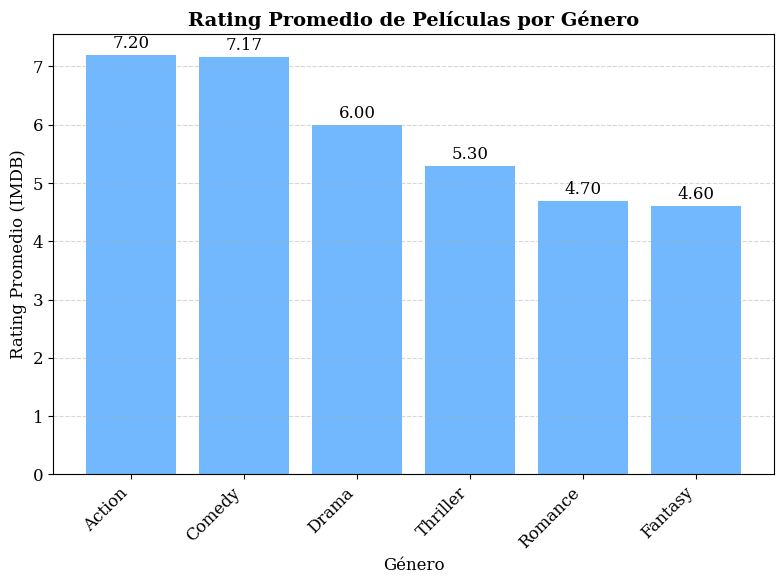

In [26]:
df_rating = df_copy.dropna(subset=['IMDB_Rating', 'Genre'])

rating_por_genero = df_rating.groupby('Genre')['IMDB_Rating'].mean().sort_values(ascending=False)

plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.size": 12
})

fig, ax = plt.subplots(figsize=(8,6))

bars = ax.bar(rating_por_genero.index, rating_por_genero.values, color='#4da6ff', alpha=0.8)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.05, f'{height:.2f}', ha='center', va='bottom')

ax.set_xlabel('Género')
ax.set_ylabel('Rating Promedio (IMDB)')
ax.set_title('Rating Promedio de Películas por Género', fontsize=14, fontweight='bold')
ax.set_xticklabels(rating_por_genero.index, rotation=45, ha='right')
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

Las peliculas que mayor rating tienen son las del genero acción y comedia, seguida por las de genero drama y thriller.

/tmp/ipython-input-2280635027.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(budget_promedio.index, rotation=45, ha='right')


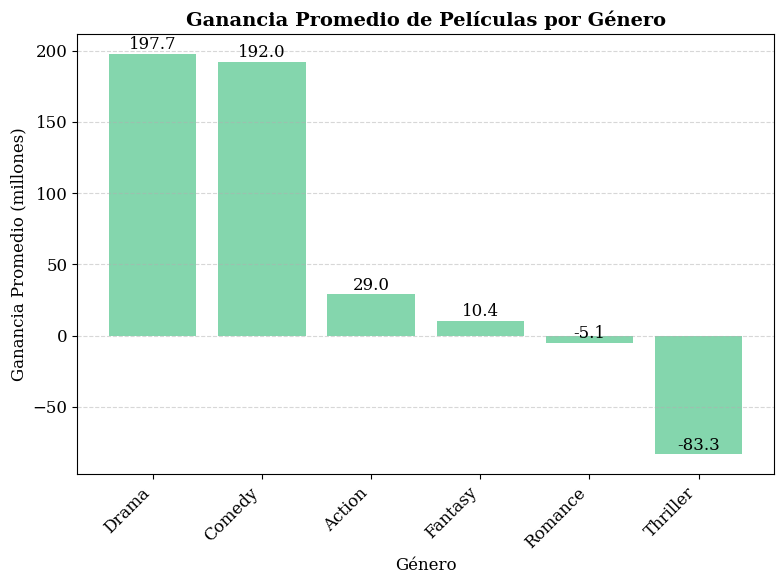

In [27]:
df_ganancia = df01.dropna(subset=['Profit'])

budget_promedio = df_ganancia.groupby('Genre')['Profit'].mean().sort_values(ascending=False)

plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.size": 12
})

fig, ax = plt.subplots(figsize=(8,6))

bars = ax.bar(budget_promedio.index, budget_promedio.values/1e6, color='#66cc99', alpha=0.8)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.1f}', ha='center', va='bottom')

ax.set_xlabel('Género')
ax.set_ylabel('Ganancia Promedio (millones)')
ax.set_title('Ganancia Promedio de Películas por Género', fontsize=14, fontweight='bold')
ax.set_xticklabels(budget_promedio.index, rotation=45, ha='right')
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


En este caso el genero de peliculas que mayor ganancias generó son las de Drama y comedia, seguidas por los generos acción, fantasia y romance. El genero Thriller es el que no genero ganancias netas, lo cual puede deberse a que se necesita mas presupuesto para la realización de la misma. En conclusión el genero mas rentable puede ser el drama y la comedia.

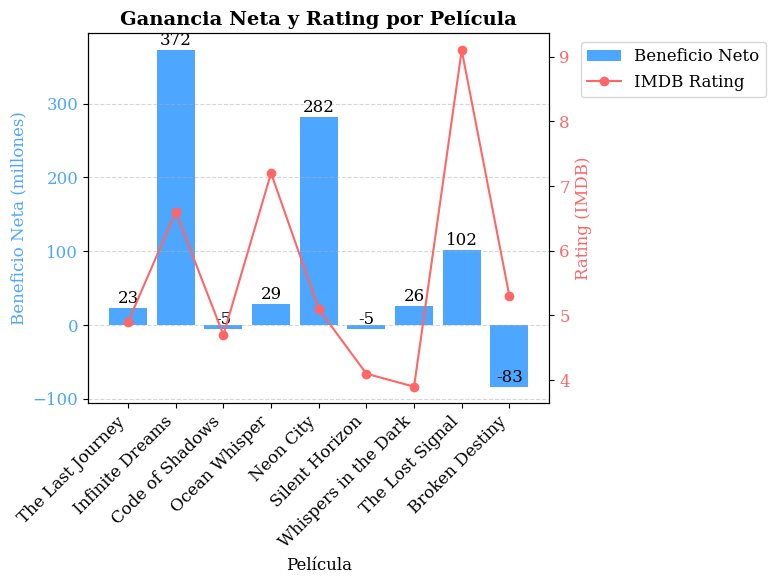

In [35]:
df_plot = df01.dropna(subset=['Profit', 'IMDB_Rating'])

x = np.arange(len(df_plot['Title']))

plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.size": 12
})

fig, ax1 = plt.subplots(figsize=(8,6))

bars = ax1.bar(x, df_plot['Profit']/1e6, color='#4da6ff', label='Beneficio Neto')
ax1.set_xlabel('Película')
ax1.set_ylabel('Beneficio Neta (millones)', color='#4da6ff')
ax1.tick_params(axis='y', labelcolor='#4da6ff')
ax1.set_xticks(x)
ax1.set_xticklabels(df_plot['Title'], rotation=45, ha='right')
ax1.grid(axis='y', linestyle='--', alpha=0.5)

for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.0f}', ha='center', va='bottom')

ax2 = ax1.twinx()
ax2.plot(x, df_plot['IMDB_Rating'], color='#ff6666', marker='o', label='IMDB Rating')
ax2.set_ylabel('Rating (IMDB)', color='#ff6666')
ax2.tick_params(axis='y', labelcolor='#ff6666')

plt.title('Ganancia Neta y Rating por Película', fontsize=14, fontweight='bold')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', bbox_to_anchor=(1.05,1))

plt.tight_layout()
plt.show()


Podemos apreciar que no hay una relación directa entre el rating que le otorga IMBD a la película y las ganancias de las mismas.

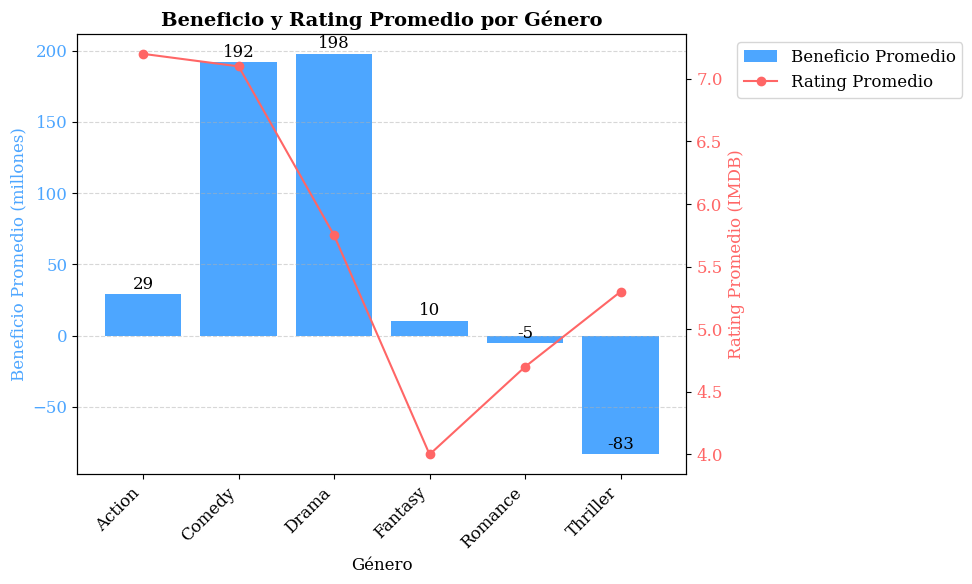

In [51]:
df_genre = df01.dropna(subset=['Genre', 'Profit', 'IMDB_Rating'])

genre_stats = df_genre.groupby('Genre').agg({
    'Profit': 'mean',
    'IMDB_Rating': 'mean'
}).reset_index()

x = np.arange(len(genre_stats['Genre']))

plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.size": 12
})

fig, ax1 = plt.subplots(figsize=(10,6))

bars = ax1.bar(x, genre_stats['Profit']/1e6, color='#4da6ff', label='Beneficio Promedio')
ax1.set_xlabel('Género')
ax1.set_ylabel('Beneficio Promedio (millones)', color='#4da6ff')
ax1.tick_params(axis='y', labelcolor='#4da6ff')
ax1.set_xticks(x)
ax1.set_xticklabels(genre_stats['Genre'], rotation=45, ha='right')
ax1.grid(axis='y', linestyle='--', alpha=0.5)

for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.0f}', ha='center', va='bottom')

ax2 = ax1.twinx()
ax2.plot(x, genre_stats['IMDB_Rating'], color='#ff6666', marker='o', label='Rating Promedio')
ax2.set_ylabel('Rating Promedio (IMDB)', color='#ff6666')
ax2.tick_params(axis='y', labelcolor='#ff6666')

plt.title('Beneficio y Rating Promedio por Género', fontsize=14, fontweight='bold')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', bbox_to_anchor=(1.07,1))

plt.tight_layout()
plt.show()


En este caso podemos concluir que los generos de comedia y drama, tienen un buen puntaje de rating promedio y sus ganancias promedios son altas en comparacion con los demas generos. Se puede concluir que son las mas rentables. También se observa que el genero acción tiene un buen puntaje pero las ganancias promedios son mucho menores en comparación a el genero comedia y drama, por ende, si bien es rentable, no produce ganacias netas como los generos mencionados anteriormente.

/tmp/ipython-input-2460602112.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df01['Year'] = pd.to_numeric(df01['Year'], errors='coerce')


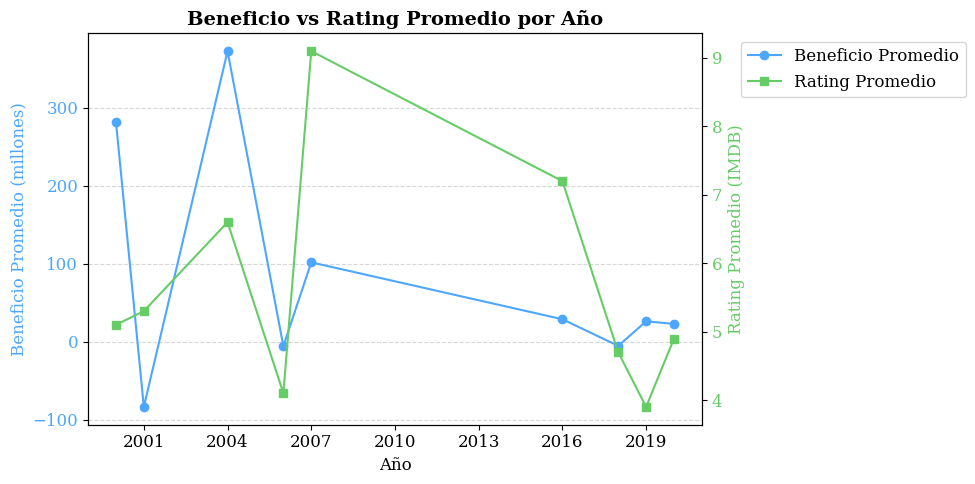

In [49]:
import matplotlib.ticker as ticker

df01['Year'] = pd.to_numeric(df01['Year'], errors='coerce')

trend = df01.groupby('Year').agg({
    'Profit': 'mean',
    'IMDB_Rating': 'mean'
}).reset_index().dropna()

plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.size": 12
})

fig, ax1 = plt.subplots(figsize=(10,5))

ax1.plot(trend['Year'], trend['Profit']/1e6, color='#4da6ff', marker='o', label='Beneficio Promedio')
ax1.set_xlabel('Año')
ax1.set_ylabel('Beneficio Promedio (millones)', color='#4da6ff')
ax1.tick_params(axis='y', labelcolor='#4da6ff')
ax1.grid(axis='y', linestyle='--', alpha=0.5)

ax2 = ax1.twinx()
ax2.plot(trend['Year'], trend['IMDB_Rating'], color='#66cc66', marker='s', label='Rating Promedio')
ax2.set_ylabel('Rating Promedio (IMDB)', color='#66cc66')
ax2.tick_params(axis='y', labelcolor='#66cc66')

ax1.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.xticks(rotation=45, ha='right')

plt.title('Beneficio vs Rating Promedio por Año', fontsize=14, fontweight='bold')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', bbox_to_anchor=(1.05,1))

plt.tight_layout()
plt.show()


En este caso es conveniente usar el dataset limpio ya que si elimino los valores nulos de cada columna que utilizo es el equivalente a eliminar todos los valores nulos.

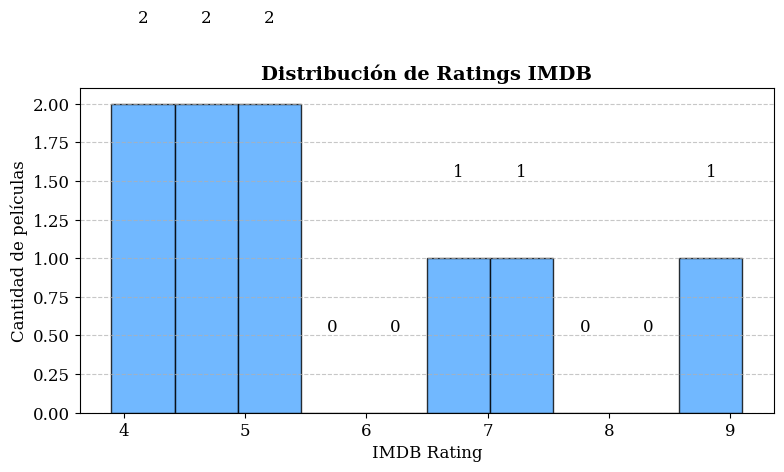

In [31]:
ratings = df01['IMDB_Rating'].dropna()

plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.size": 12
})

fig, ax = plt.subplots(figsize=(8,5))

n, bins, patches = ax.hist(ratings, bins=10, color='#4da6ff', edgecolor='black', alpha=0.8)

for count, patch in zip(n, patches):
    height = patch.get_height()
    ax.text(patch.get_x() + patch.get_width()/2, height + 0.5, f'{int(height)}', ha='center', va='bottom')

ax.set_xlabel('IMDB Rating')
ax.set_ylabel('Cantidad de películas')
ax.set_title('Distribución de Ratings IMDB', fontsize=14, fontweight='bold')
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


La distribución de los ratings no parece ajustarse a una distribución normal. Esto puede deberse a la escasa cantidad de películas en el dataset, lo cual limita la representatividad estadística y genera que la forma de la distribución no sea simétrica ni con la clásica “campana de Gauss”.

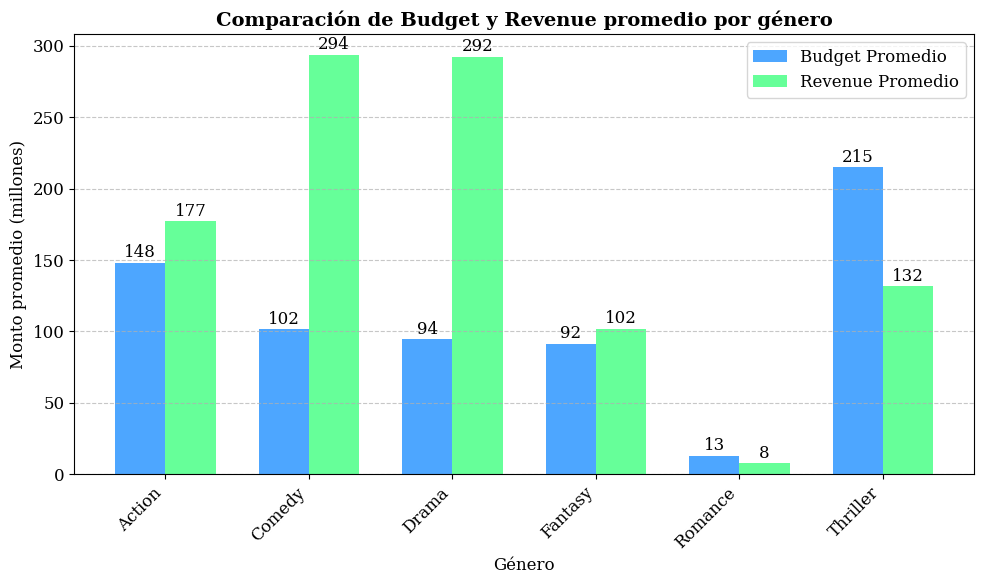

In [53]:
df_genre = df01.dropna(subset=['Genre', 'Budget', 'Revenue'])
df_promedios = df_genre.groupby('Genre').agg({
    'Budget': 'mean',
    'Revenue': 'mean'
}).reset_index()

x = np.arange(len(df_promedios['Genre']))
width = 0.35

plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.size": 12
})

fig, ax = plt.subplots(figsize=(10,6))

bars1 = ax.bar(x - width/2, df_promedios['Budget']/1e6, width, label='Budget Promedio', color='#4da6ff')
bars2 = ax.bar(x + width/2, df_promedios['Revenue']/1e6, width, label='Revenue Promedio', color='#66ff99')

for b in bars1:
    ax.text(b.get_x() + b.get_width()/2, b.get_height()+1, f'{b.get_height():.0f}', ha='center', va='bottom')
for b in bars2:
    ax.text(b.get_x() + b.get_width()/2, b.get_height()+1, f'{b.get_height():.0f}', ha='center', va='bottom')

ax.set_xlabel('Género')
ax.set_ylabel('Monto promedio (millones)')
ax.set_title('Comparación de Budget y Revenue promedio por género', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(df_promedios['Genre'], rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



Nuevamente podemos observar que los generos de comedia y drama no requieren una gran inversión respecto a las recaudaciones en comparación con los géneros thriller y romance.